In [2]:
# 결측자료 대체
import numpy as np
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],
                [None,10,11,12], [13,np.nan,15,16]])
print(x_miss)
import pandas as pd
x_m=pd.DataFrame(x_miss, columns =list('abcd'))
print(x_m)
x_m['b']=x_m['b'].fillna(x_m['b'].mode())
print(x_m)
x_m['b']=x_m['b'].fillna(x_m['b'].mode(0))
print(x_m)

[[1 2 3 None]
 [5 nan 7 8]
 [None 10 11 12]
 [13 nan 15 16]]
      a    b   c     d
0     1    2   3  None
1     5  NaN   7     8
2  None   10  11    12
3    13  NaN  15    16
      a     b   c     d
0     1   2.0   3  None
1     5  10.0   7     8
2  None  10.0  11    12
3    13   NaN  15    16
      a     b   c     d
0     1   2.0   3  None
1     5  10.0   7     8
2  None  10.0  11    12
3    13   NaN  15    16


In [4]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='mean')
im.fit_transform(x_miss) # 열의 평균값으로 대체

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [7]:
# 특성변수 생성(교호작용까지)과 결측자료 대체까지 한번에 해주려면 pipeline 이용.
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
y=pd.Series([2,5,1,6])
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2), LinearRegression())
model.fit(x_miss,y)
model.predict(x_miss) # 이 자료에서는 관측치는 4개, 특성변수 14개로 완전적합됨.

array([2., 5., 1., 6.])

In [11]:
# www.kaggle.com 으로 들어간 후 새로운 account를 생성하고
# www.kaggle.com/c/rossmann-store-sales/data 에서 자료를 다운받는다.
import pandas as pd
df1=pd.read_csv("./train.csv", engine='python')
print(df1.shape)
type(df1)

(1017209, 9)


pandas.core.frame.DataFrame

In [13]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
df2=pd.read_csv("./store.csv",engine='python')
df2.shape

(1115, 10)

In [17]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
df=pd.merge(df1,df2,on='Store')
df.shape

(1017209, 18)

In [21]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [24]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
942
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


In [27]:
import numpy as np
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.week
df['Season']=np.where(df['Month'].isin([3,4,5]),'Spring',
                      np.where(df['Month'].isin([6,7,8]),'Summer',
                      np.where(df['Month'].isin([9,10,11]),'fall',
                      np.where(df['Month'].isin([12,1,2]),'winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())

C:\Users\user\AppData\Local\Temp\ipykernel_15492\2655429857.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week']=df['Date'].dt.week


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>

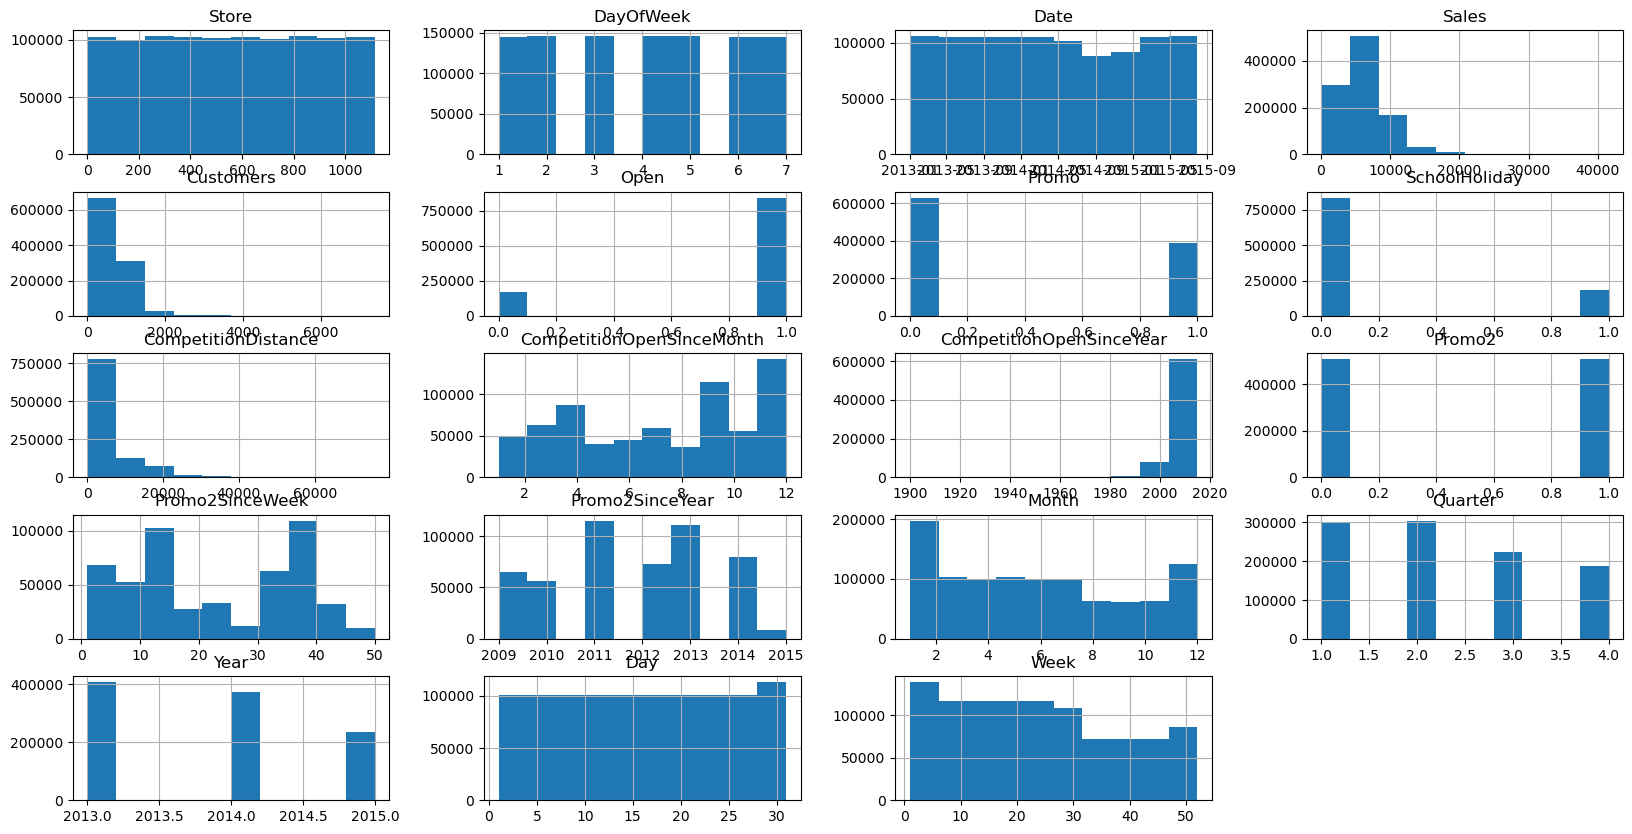

In [29]:
df.hist(figsize=(20,10))

In [31]:
df.isnull().sum()/df.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [34]:
df['CompetitionDistance'].mode()
df['CompetitionDistance']= \
     df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode()[0])
df['CompetitionDistance'].isnull().sum()
#df['CompetitionDistance].head()

0

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
n_columns=['Customers', 'Open','Promo','Promo2','StateHoliday',
           'SchoolHoliday','CompetitionDistance']
categ_columns=['DayOfWeek','Quarter','Month','Year','StoreType',
               'Assortment', 'Season']

In [38]:
def dummy(data,col):
    lab=LabelEncoder() #0~c-1로 클래스 부여
    aa=lab.fit_transform(data[col]).reshape(-1,1)
    ohe=OneHotEncoder(sparse=False)
    column_names=[col+'_'+str(i) for i in lab.classes_]
    return(pd.DataFrame(ohe.fit_transform(aa),columns=column_names))

In [42]:
fdata=df[n_columns]
for column in categ_columns:
    temp_df=dummy(df,column)
    fdata=pd.concat([fdata,temp_df], axis=1)
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Spring,Season_Summer,Season_fall,Season_winter
0,555,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,546,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,523,1,1,0,0,1,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,560,1,1,0,0,1,1270.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,612,1,1,0,0,1,1270.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
fdata.shape

(1017209, 44)

In [46]:
fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [48]:
fdata['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [49]:
fdata['StateHoliday']=np.where(fdata['StateHoliday']=='o',0,1)